In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm


fp = ff1.get_session(2023, 'Singapore', 'R')
#fp_laps = fp.load_laps(with_telemetry=True)
fp.load()
race_laps = fp.laps

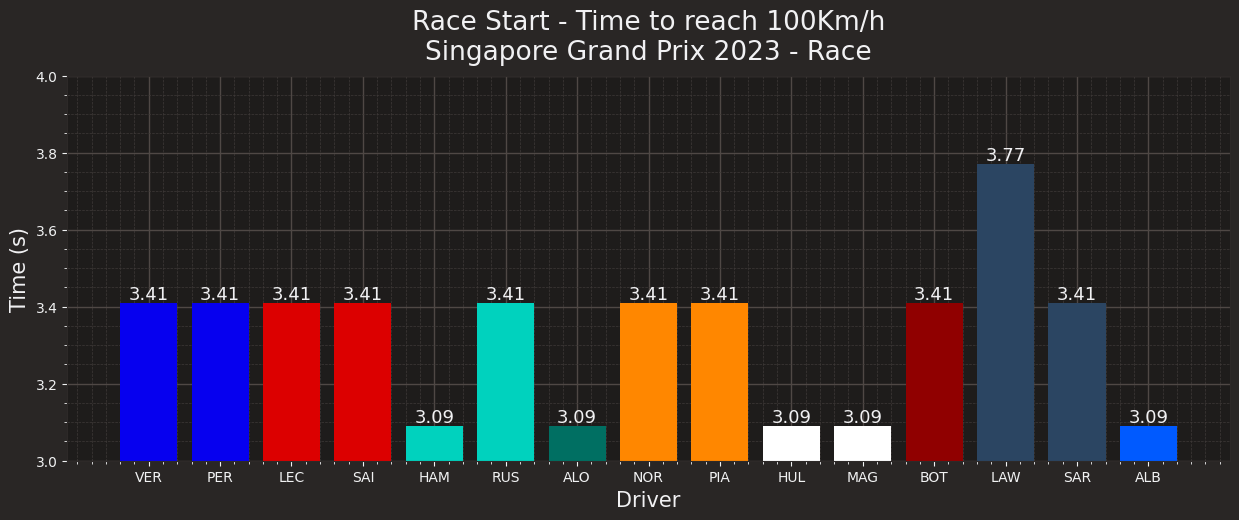

In [17]:
from collections import OrderedDict
race_laps = race_laps.loc[race_laps['LapNumber']==1]
drivers = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'NOR', 'PIA', 'HUL', 'BOT', 'SAR', 'ALB', 'LAW', 'MAG']
tel_dict = dict.fromkeys(drivers)
time_dict = dict.fromkeys(drivers)

for driver in drivers:
        tel_dict[driver] = (race_laps.pick_driver(driver).get_car_data().query('Speed >= 100'))['Time'].iloc[0].total_seconds()       

team_color_drvrs = ['VER', 'PER', 'LEC', 'SAI', 'HAM', 'RUS', 'ALO', 'NOR', 'PIA', 'HUL', 'MAG', 'BOT', 'LAW', 'SAR', 'ALB']
team_colors = [ff1.plotting.team_color('RedBull'),ff1.plotting.team_color('RedBull'), 
               ff1.plotting.team_color('Ferrari'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Mercedes'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Aston Martin'), 
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('McLaren'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Alfa Romeo'), 
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Alpha Tauri'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Williams'),]

tel_dict_ordered = OrderedDict((k, tel_dict[k]) for k in team_color_drvrs)
tel_dict_ordered = dict(tel_dict_ordered)

for key in tel_dict_ordered:
        tel_dict_ordered[key] = round(tel_dict_ordered[key], 2)

ff1.plotting.setup_mpl()
fig, ax = plt.subplots(figsize=(15, 5))
plt.bar_label(plt.bar(range(len(tel_dict_ordered)), list(tel_dict_ordered.values()), align='center', color=team_colors), fontsize = 13)
plt.xticks(range(len(tel_dict_ordered)), list(tel_dict_ordered.keys()))
plt.title(f"Race Start - Time to reach 100Km/h\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
ax.set_ylim([3.0, 4])

plt.xlabel('Driver', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.show()

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

race = fastf1.get_session(2023, "Singapore", 'R')
race.load()
laps = race.laps.pick_quicklaps()

In [ ]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)
# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

display(team_palette)



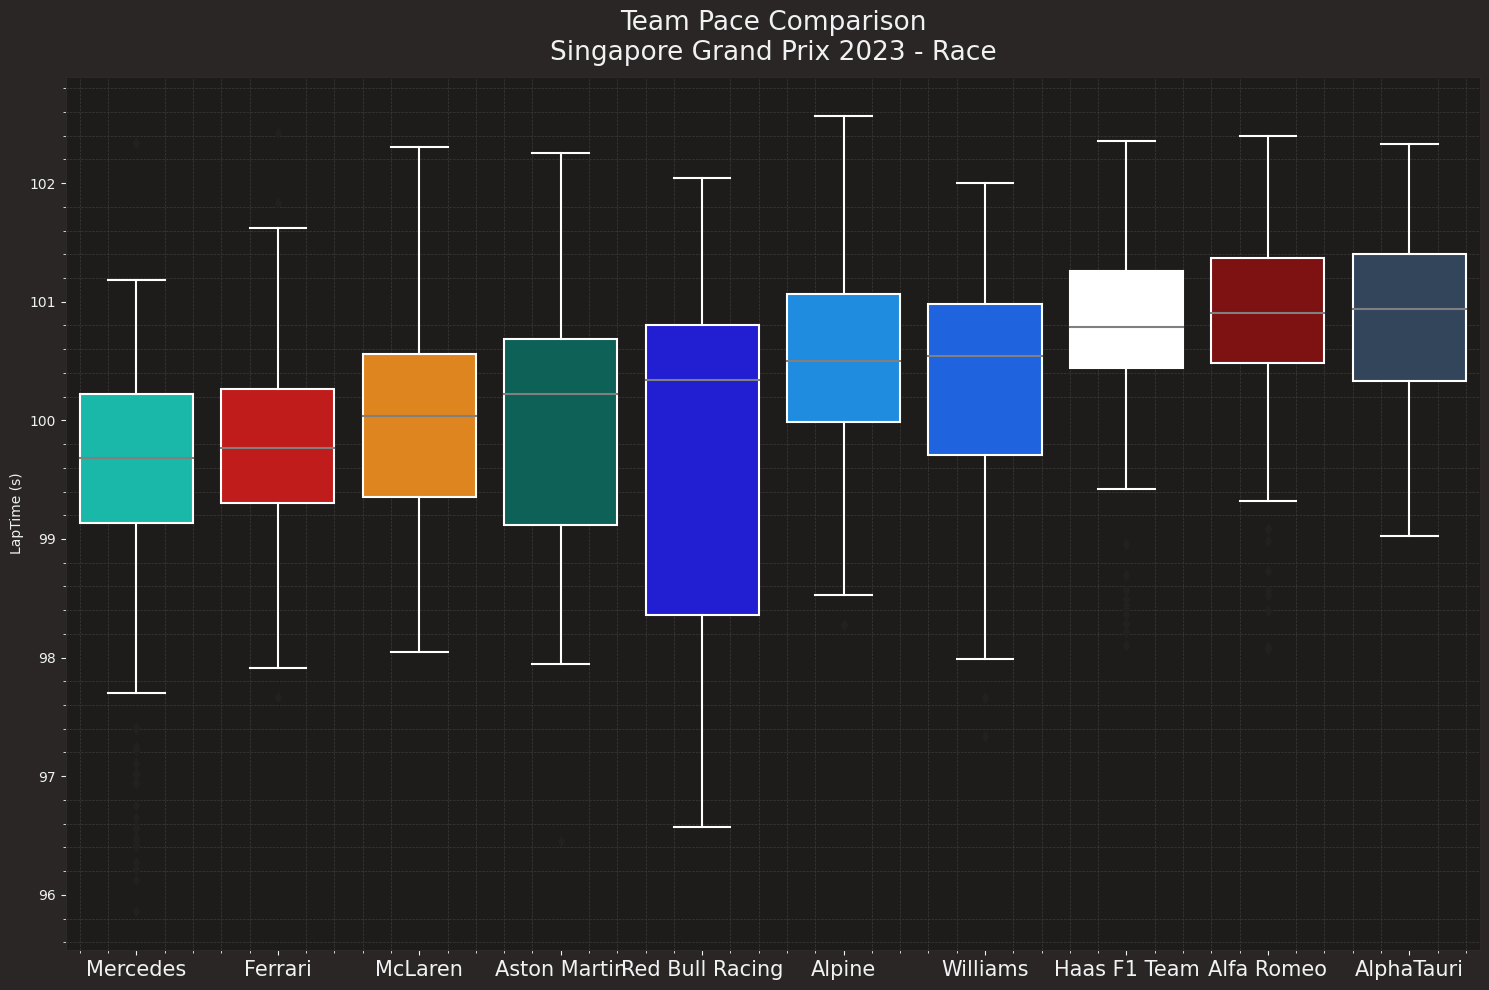

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

ax.tick_params(axis='x', labelsize=15)

plt.title(f"Team Pace Comparison\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=False)

ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [ ]:
race = fastf1.get_session(2023, "Singapore", 'R')
race.load()
laps = race.laps.pick_quicklaps()

In [ ]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)
# make a color palette associating drivers to hex codes
driver_palette =  dict()
for driver in team_order:
    driver_palette[driver] = "#"+race.results[race.results['Abbreviation'] == driver]['TeamColor'].values[0]

display(driver_palette)

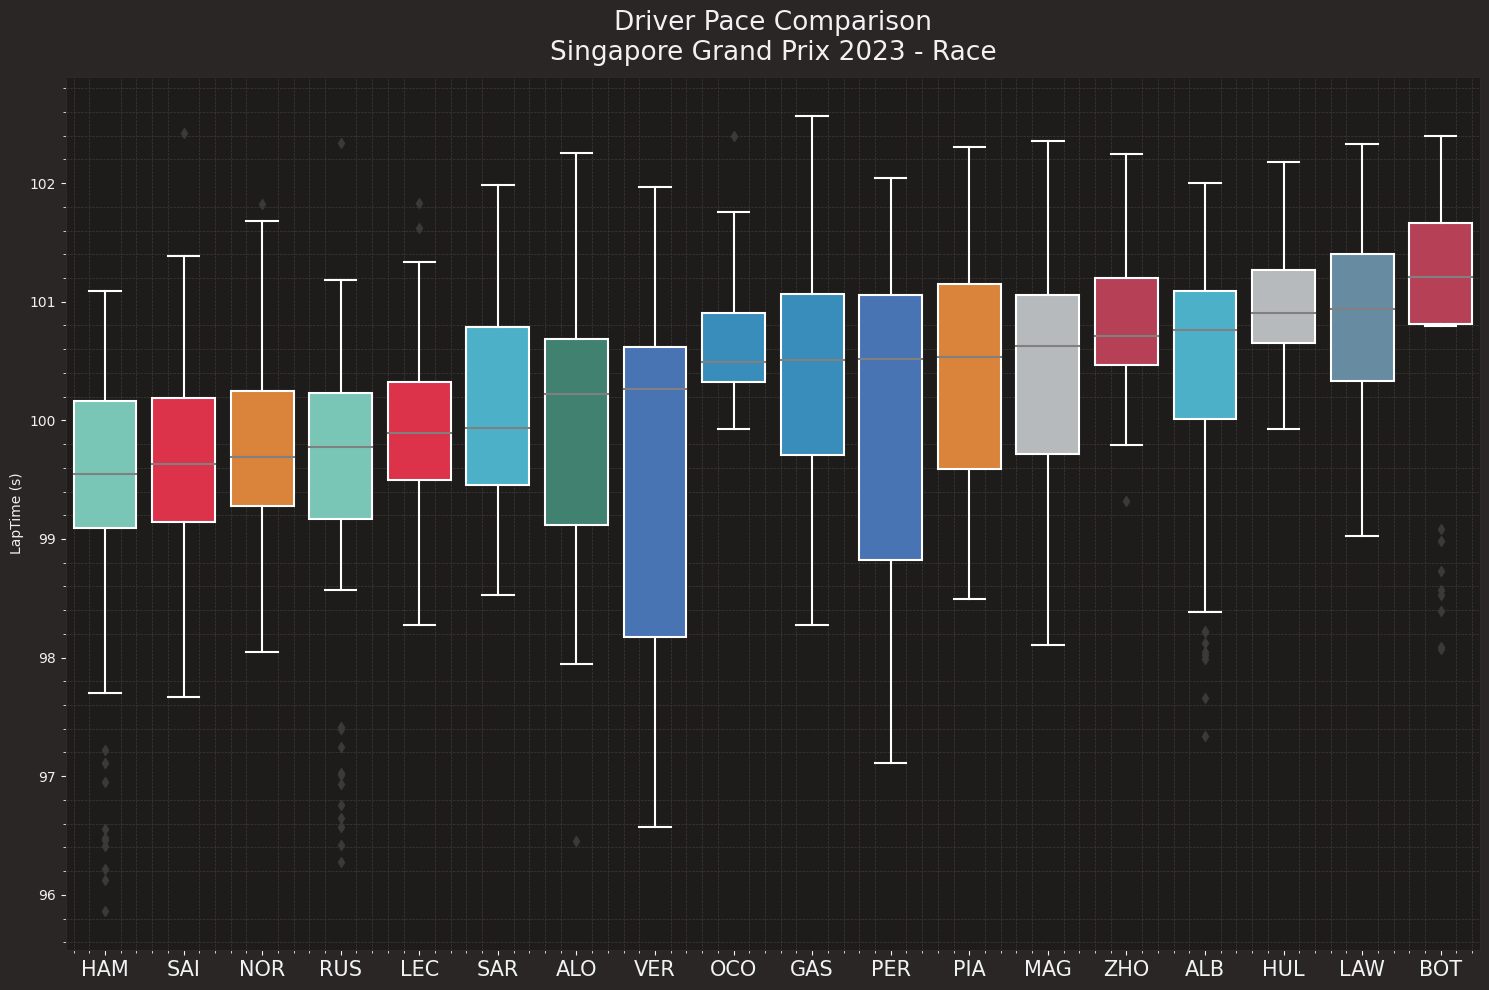

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    order=team_order,
    palette=driver_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

ax.tick_params(axis='x', labelsize=15)

plt.title(f"Driver Pace Comparison\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.grid(visible=False)

ax.set(xlabel=None)
plt.tight_layout()
plt.show()